### Used Car Price Prediction Using Random Forest and Machine Learning Techniques

### Importing dependencies

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### Downloading the dataset from Kaggle

In [3]:
import kagglehub

path = kagglehub.dataset_download("amanrajput16/used-car-price-data-from-cars24")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\gaikw\.cache\kagglehub\datasets\amanrajput16\used-car-price-data-from-cars24\versions\1


### loading the dataset

In [4]:
df = pd.read_csv(path+"/cars24data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [6]:
df.shape

(1445, 11)

In [7]:
df.head(5)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [8]:
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


### Heatmap

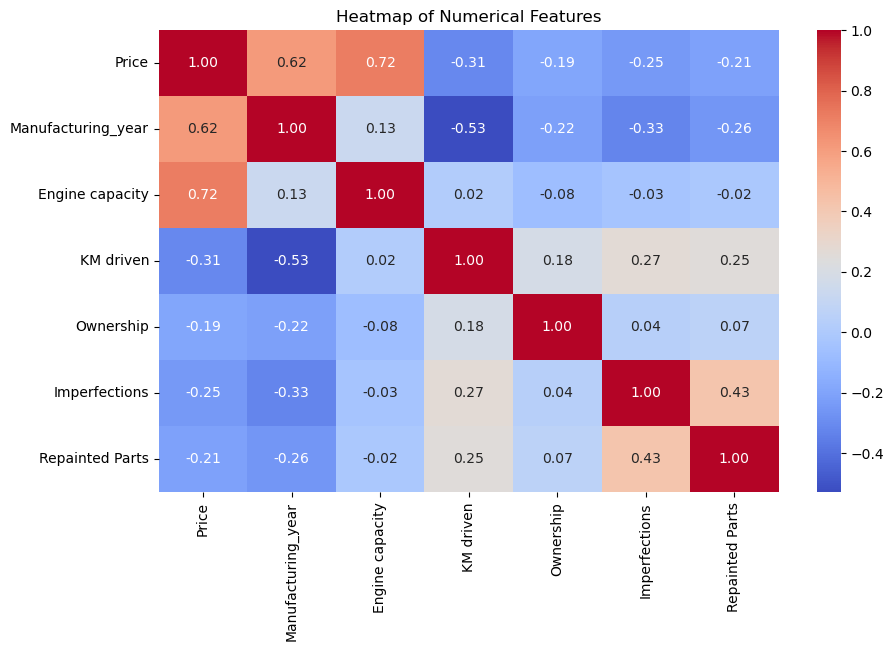

In [9]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numerical Features")
plt.show()

In [12]:
print("max price =",df['Price'].max()," \nmin price =",df['Price'].min())
print("max Imperfections =",df['Imperfections'].max(),"\nmin Imperfections =",df['Imperfections'].min())
print("max Repainted Parts =",df['Repainted Parts'].max(),"\nmin Repainted Parts =",df['Repainted Parts'].min())

max price = 1599000  
min price = 139000
max Imperfections = 43 
min Imperfections = 0
max Repainted Parts = 27 
min Repainted Parts = 0


### Data cleaning

In [13]:
df.columns

Index(['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity',
       'Spare key', 'Transmission', 'KM driven', 'Ownership', 'Fuel type',
       'Imperfections', 'Repainted Parts'],
      dtype='object')

In [14]:
df.head(2)


,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1


In [15]:
df['Model Name'].nunique()

573

In [16]:
df['Model Name']=df['Model Name'].apply(lambda x: x[12:])

In [17]:
df['Model Name'] = df['Model Name'].apply(lambda x: "Wagon R" if "new wagon-r" in x.lower() else x)

In [18]:
df.sample(3)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
338,Wagon R 1.0 VXI OPT,371000,2017,998,Yes,Manual,43944,2,Petrol,14,0
1079,IGNIS ZETA 1.2 AMT,465000,2017,1197,No,Automatic,95525,2,Petrol,3,5
855,Wagon R,503000,2020,998,Yes,Manual,67693,1,CNG,23,4


In [19]:
df['Model Name'] = df['Model Name'].apply(lambda x: x.split()[0])  

In [20]:
df.sample(10)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
523,Wagon,356000,2014,998,Yes,Manual,65835,1,CNG,15,11
1382,IGNIS,418000,2018,1197,No,Manual,94910,1,Petrol,16,0
138,Wagon,373000,2016,998,Yes,Manual,77225,1,Petrol,19,2
110,Wagon,320000,2015,998,No,Manual,43791,3,Petrol,2,3
1156,Wagon,502000,2019,998,Yes,Automatic,67526,1,Petrol,11,0
1027,Alto,319000,2019,796,No,Manual,41155,1,Petrol,17,5
1060,Swift,619000,2019,1197,Yes,Manual,32730,2,Petrol,14,1
121,Celerio,415000,2018,998,Yes,Manual,99649,1,Petrol,2,5
1267,Swift,553000,2018,1197,No,Manual,26638,2,Petrol,3,0
1069,Swift,411000,2013,1197,Yes,Manual,59700,3,Petrol,0,0


In [21]:
df['Imperfections'].max()

43

In [22]:
print("Number of unique values in Model Name attribute", df['Model Name'].nunique())
df['Model Name'].unique()

Number of unique values in Model Name attribute 20


array(['Swift', 'Baleno', 'Ertiga', 'Dzire', 'Alto', 'S', 'Celerio',
       'IGNIS', 'Wagon', 'Ciaz', 'Vitara', 'BREZZA', 'XL6', 'Ritz',
       'Eeco', 'Grand', 'OMNI', 'Zen', 'A', 'Omni'], dtype=object)

### Drop Spare key

In [23]:
df.drop(columns=['Spare key'], inplace=True)
df.columns


Index(['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity',
       'Transmission', 'KM driven', 'Ownership', 'Fuel type', 'Imperfections',
       'Repainted Parts'],
      dtype='object')

### Checking Outlier

In [25]:
print("\n Outlier Checking (IQR Method):")
for col in df.select_dtypes(include=['number']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers detected.")
    else:
        print(f"{col}: No significant outliers.")


 Outlier Checking (IQR Method):
Price: 46 outliers detected.
Manufacturing_year: No significant outliers.
Engine capacity: No significant outliers.
KM driven: No significant outliers.
Ownership: No significant outliers.
Imperfections: 36 outliers detected.
Repainted Parts: 23 outliers detected.


In [26]:
df.head(5)

,Model Name,Price,Manufacturing_year,Engine capacity,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,Swift,561000,2017,1197,Manual,25847,2,Petrol,6,2
1,Baleno,498000,2016,1197,Manual,55511,2,Petrol,12,1
2,Swift,577000,2020,1197,Manual,47110,1,Petrol,4,2
3,Ertiga,1084000,2022,1462,Automatic,35378,1,Petrol,2,3
4,Dzire,603000,2019,1197,Manual,91856,1,Petrol,3,2


### EDA

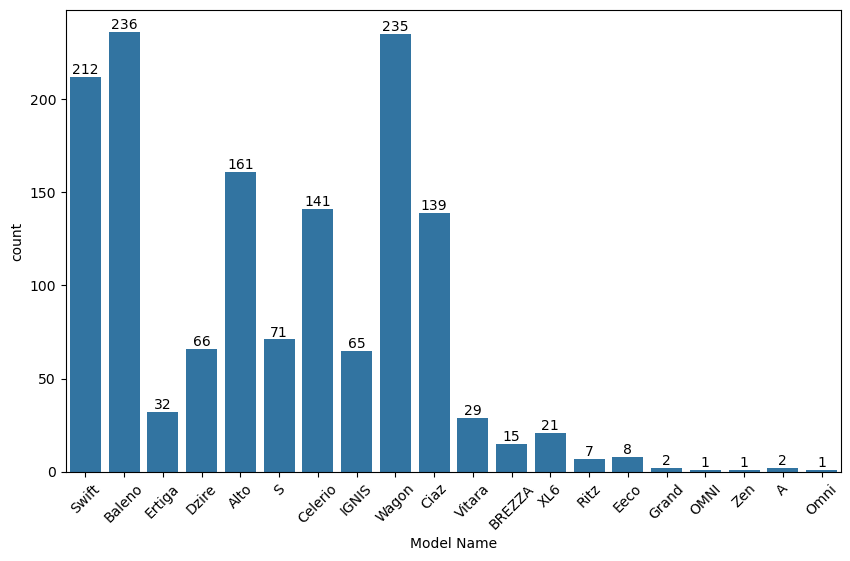

In [27]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Model Name', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

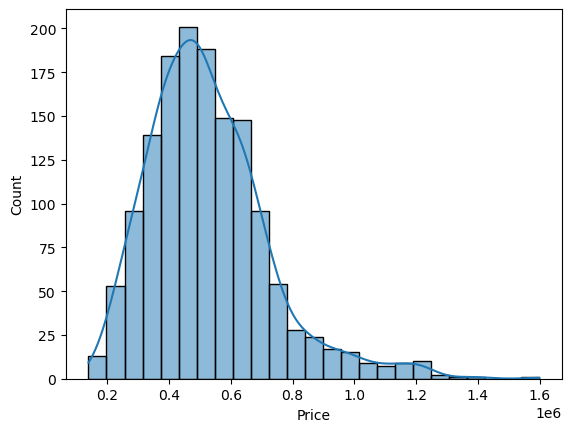

In [28]:
sns.histplot(df['Price'], bins=25, kde=True)
plt.show()

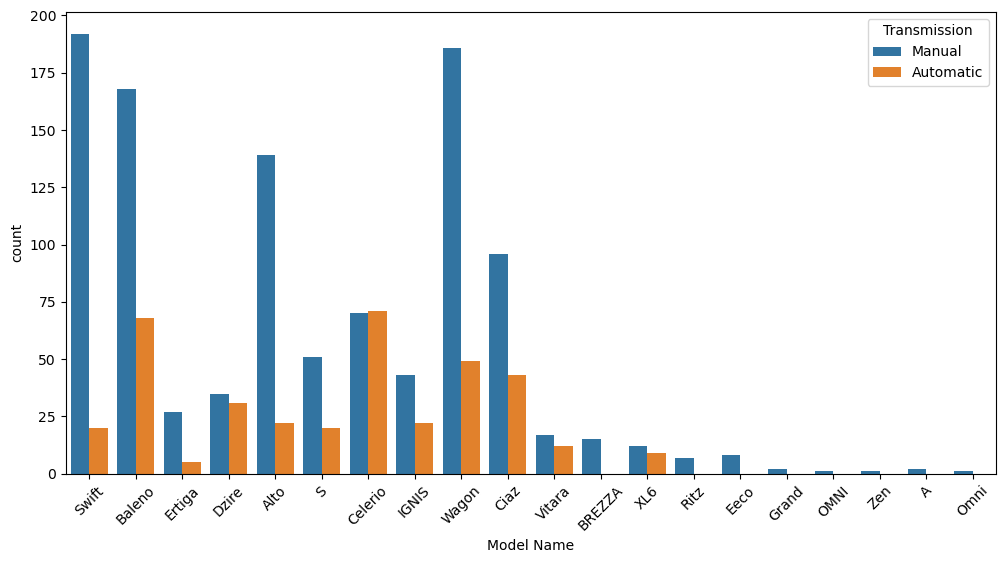

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Model Name", hue="Transmission", data=df)
plt.xticks(rotation=45)
plt.show()

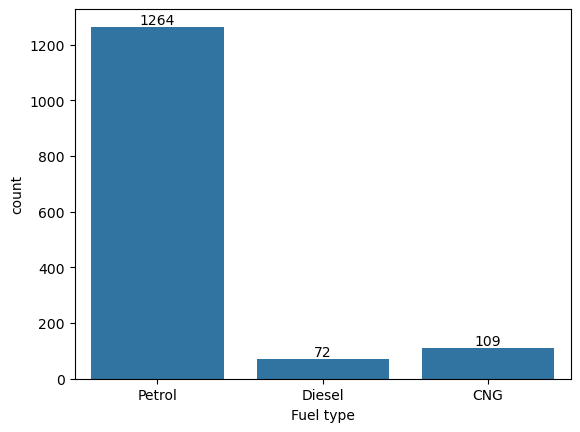

In [30]:
ax=sns.countplot(x="Fuel type", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

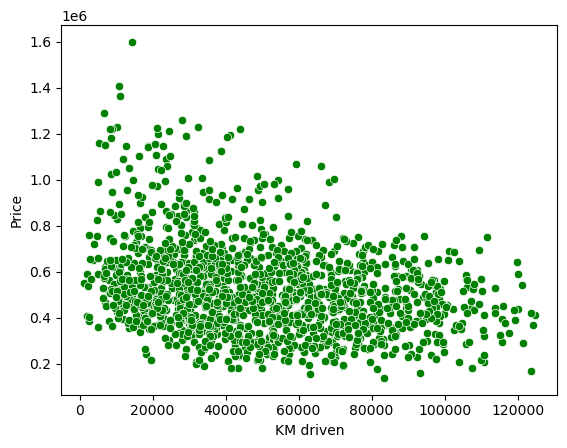

In [31]:
sns.scatterplot(x="KM driven", y="Price", data=df, color='green')
plt.show()


### negative correlation between kilometers driven and car price, meaning higher mileage generally leads to lower value

In [33]:
print("max - ",df['Ownership'].min())
print("min - ",df['Ownership'].max())

max -  1
min -  3


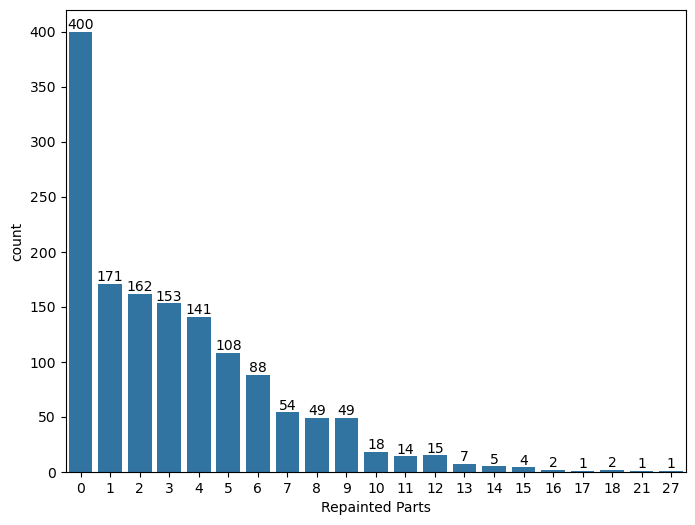

In [34]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x="Repainted Parts", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

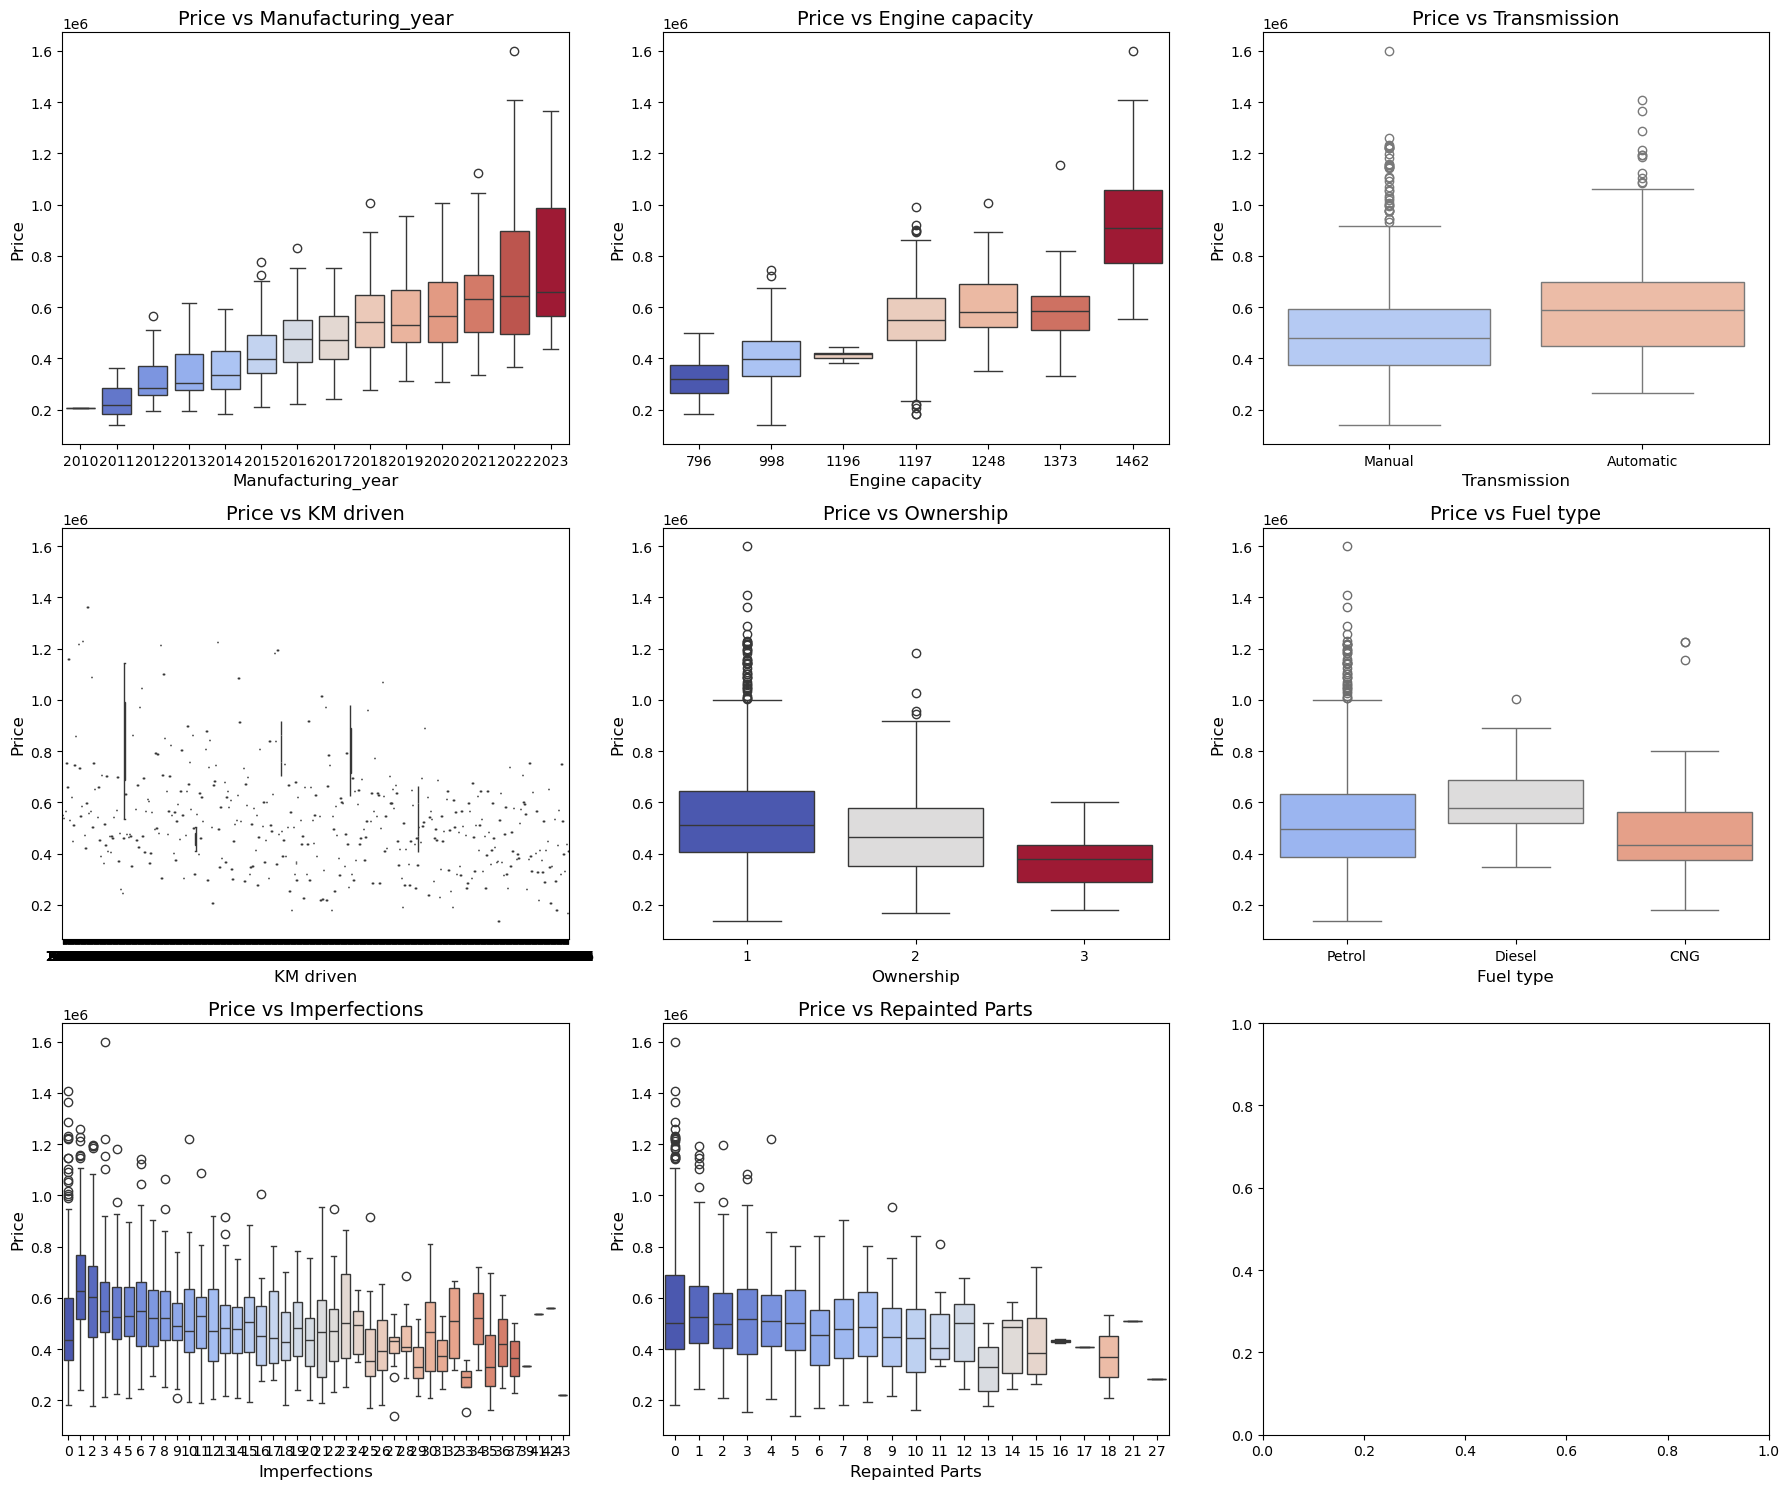

In [35]:
features = ["Manufacturing_year", "Engine capacity", "Transmission",
            "KM driven", "Ownership", "Fuel type", "Imperfections", "Repainted Parts"]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], y=df["Price"], hue=df[feature], palette="coolwarm", ax=axes[i], legend=False)
    axes[i].set_title(f"Price vs {feature}", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Price", fontsize=12)
plt.tight_layout()
plt.show()

## Encoding

In [38]:
df.head(2)

,Model Name,Price,Manufacturing_year,Engine capacity,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,Swift,561000,2017,1197,Manual,25847,2,Petrol,6,2
1,Baleno,498000,2016,1197,Manual,55511,2,Petrol,12,1


In [39]:
object_cols=[]
for cols in df.select_dtypes(include=['object']).columns:
    object_cols.append(cols)

object_cols

['Model Name', 'Transmission', 'Fuel type']

### Using label encoder for 'Model Name', 'Transmission', 'Fuel type

In [41]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for cols in object_cols:
    df[cols] = encoder.fit_transform(df[cols])
    

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Model Name          1445 non-null   int64
 1   Price               1445 non-null   int64
 2   Manufacturing_year  1445 non-null   int64
 3   Engine capacity     1445 non-null   int64
 4   Transmission        1445 non-null   int64
 5   KM driven           1445 non-null   int64
 6   Ownership           1445 non-null   int64
 7   Fuel type           1445 non-null   int64
 8   Imperfections       1445 non-null   int64
 9   Repainted Parts     1445 non-null   int64
dtypes: int64(10)
memory usage: 113.0 KB


### Removing the target variable "Price" from the dataset and storing it in `y`.

In [46]:
X=df.drop(columns=['Price'])
y = df[['Price']]


### Scaling both X and y to standardize their feature values this will improve model performance.

In [48]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

print("X shape:", X_scaled.shape)
print("y shape:", y_scaled.shape)   

X shape: (1445, 9)
y shape: (1445, 1)


## Train Test split

In [49]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

In [50]:
X_scaled

array([[ 1.01956221, -0.27375494,  0.32489789, ...,  0.3597118 ,
        -0.42845964, -0.36521636],
       [-0.94544932, -0.60870488,  0.32489789, ...,  0.3597118 ,
         0.28618928, -0.66253335],
       [ 1.01956221,  0.7310949 ,  0.32489789, ...,  0.3597118 ,
        -0.66667595, -0.36521636],
       ...,
       [-0.94544932,  0.39614495,  0.32489789, ...,  0.3597118 ,
         1.71548712,  0.2294176 ],
       [-0.6179474 , -0.27375494,  1.36655023, ...,  0.3597118 ,
        -0.66667595,  0.52673459],
       [ 1.34706414, -1.94850467, -0.85287948, ...,  0.3597118 ,
         1.23905451,  1.71600252]])

In [51]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1011, 9)
X_test shape: (434, 9)
y_train shape: (1011, 1)
y_test shape: (434, 1)


### Training The Model

In [55]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Predictions

In [ ]:
linear_model_pred = linear_model.predict(X_test)

### Scores

In [57]:
# Evaluate model performance
print("Linear Model Scores:")
print("R² score:", r2_score(y_test, linear_model_pred))
print("Mean Squared Error:", mean_squared_error(y_test, linear_model_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, linear_model_pred))


Linear Model Scores:
R² score: 0.8204066990620049
Mean Squared Error: 0.17527770658441466
Mean Absolute Error: 0.31582835585893526


## Actual vs Predicted Values

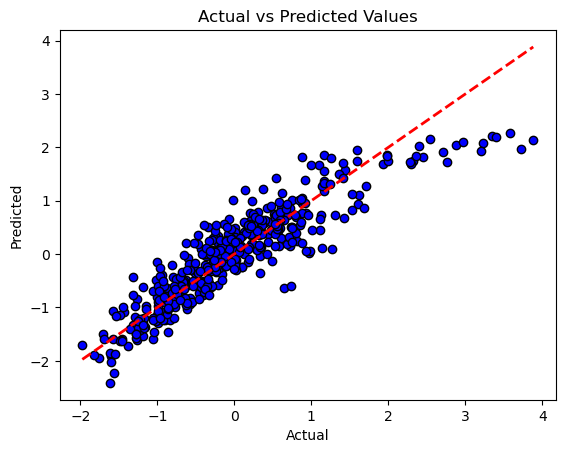

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_test, linear_model_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


              Feature        VIF
0          Model Name   3.200148
1  Manufacturing_year  75.247529
2     Engine capacity  48.566757
3        Transmission   4.076399
4           KM driven   5.320424
5           Ownership   8.241439
6           Fuel type  12.808032
7       Imperfections   2.941747
8     Repainted Parts   2.430827


In [258]:
from sklearn.linear_model import Lasso

# Initialize Lasso model with alpha (regularization strength)
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict
lasso_pred = lasso_model.predict(X_test)

In [259]:
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

# Print results
print(f'R² Score: {lasso_r2:.4f}')
print(f'Mean Squared Error: {lasso_mse:.4f}')
print(f'Mean Absolute Error: {lasso_mae:.4f}')


R² Score: 0.7904
Mean Squared Error: 0.2046
Mean Absolute Error: 0.3233


In [223]:
from sklearn.linear_model import Ridge

# Initialize Ridge model with regularization strength (alpha)
ridge_model = Ridge(alpha=0.1)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict
ridge_pred = ridge_model.predict(X_test)

In [224]:
# Calculate evaluation metrics
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# Print results
print(f'R² Score: {ridge_r2:.4f}')
print(f'Mean Squared Error: {ridge_mse:.4f}')
print(f'Mean Absolute Error: {ridge_mae:.4f}')


R² Score: 0.8204
Mean Squared Error: 0.1753
Mean Absolute Error: 0.3158


# Random Forest Regressor

In [225]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [246]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [247]:
rf_model_pred=rf_model.predict(X_test)

In [248]:
print("Random Forest Regressor Model Scores:")
print("R2 score:", r2_score(y_test, rf_model_pred))
print("Mean squared error:", mean_squared_error(y_test, rf_model_pred))
print("Mean absolute error:", mean_absolute_error(y_test, rf_model_pred))

Random Forest Regressor Model Scores:
R2 score: 0.8817322386921289
Mean squared error: 0.11542580851650795
Mean absolute error: 0.23485366725228696


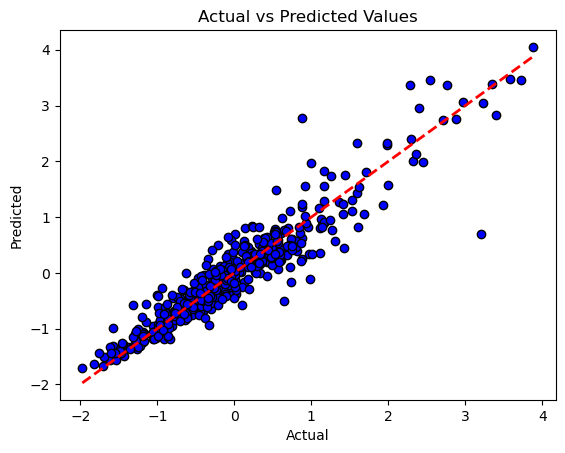

In [249]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_model_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best R² score: 0.9069181635363194


In [233]:
rf_model_pred_2 = grid_search.best_estimator_.predict(X_test)

In [234]:
print("Random Forest Regressor Model after grid search Scores:")
print("R2 score:", r2_score(y_test, rf_model_pred_2))
print("Mean squared error:", mean_squared_error(y_test, rf_model_pred_2))
print("Mean absolute error:", mean_absolute_error(y_test, rf_model_pred_2))

Random Forest Regressor Model after grid search Scores:
R2 score: 0.8870989587557736
Mean squared error: 0.11018804975978817
Mean absolute error: 0.23196315423903155


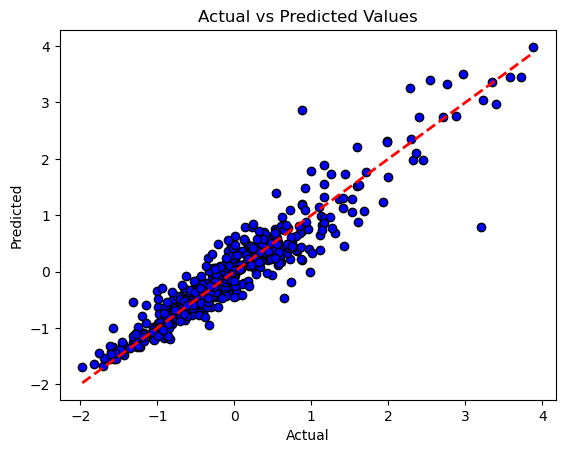

In [235]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_model_pred_2, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


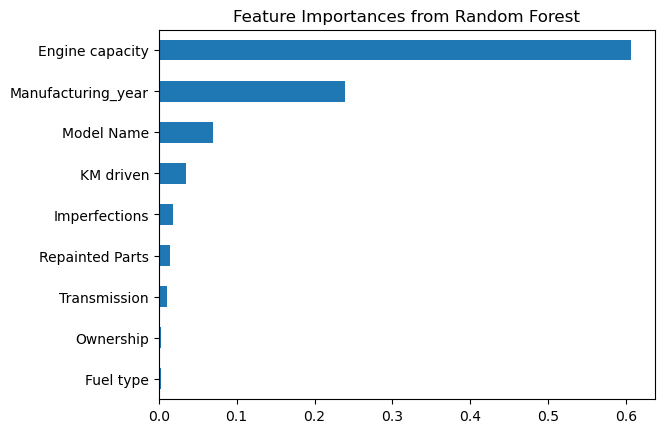

In [236]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.show()


In [252]:
encoder = LabelEncoder()
df['Model Name_encoded'] = encoder.fit_transform(df['Model Name'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19}


In [261]:
# saving the model using joblib another way to save model is pickle

from joblib import dump

dump(rf_model, "rf_model.joblib")  
from joblib import load

model = load("rf_model.joblib")

In [136]:
# todo
# for LR
# Drop spare key column
# do standard scaler

# in random foret 
# do cross validatin
# do desision tres
